**Abstract**

The aim of this project is to identify and categorize clusters of airline passengers based on their shared characteristics and preferences.

Techniques:  Clustering (KMeans and Agglomerative)

Dataset: Airline Passenger Satisfaction

**About Data:**

1. Gender - Gender of the passengers (Female, Male)
2. Customer Type - The customer type (Loyal customer, disloyal customer)
3. Age - The actual age of the passengers
4. Type of Travel - Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. Class - Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. Flight distance - The flight distance of this journey
7. Inflight wifi service - Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8. Departure/Arrival time convenient - Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking - Satisfaction level of online booking
10. Gate location - Satisfaction level of Gate location
11. Food and drink - Satisfaction level of Food and drink
12. Online boarding - Satisfaction level of online boarding
13. Seat comfort - Satisfaction level of Seat comfort
14. Inflight entertainment - Satisfaction level of inflight entertainment
15. On-board service - Satisfaction level of On-board service
16. Leg room service - Satisfaction level of Leg room service
17. Baggage handling - Satisfaction level of baggage handling
18. Check-in service - Satisfaction level of Check-in service
19. Inflight service - Satisfaction level of inflight service
20. Cleanliness - Satisfaction level of Cleanliness
21. Departure Delay in Minutes - Minutes delayed when departure
22. Arrival Delay in Minutes - Minutes delayed when Arrival
23. Satisfaction - Airline satisfaction level(Satisfaction, neutral or dissatisfaction)



In [1]:
!pip install memory_profiler
import time
import memory_profiler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [2]:
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("airline_satisfaction.csv")
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Pre-processing Data

In [5]:
data= data.dropna()

In [6]:
data=data.drop(['Unnamed: 0','id'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Customer Type'] = le.fit_transform(data['Customer Type'])
data['Type of Travel'] = le.fit_transform(data['Type of Travel'])
data['Class'] = le.fit_transform(data['Class'])

In [8]:
data=data.drop(['satisfaction'],axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  int64  
 4   Class                              103594 non-null  int64  
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

Model Training

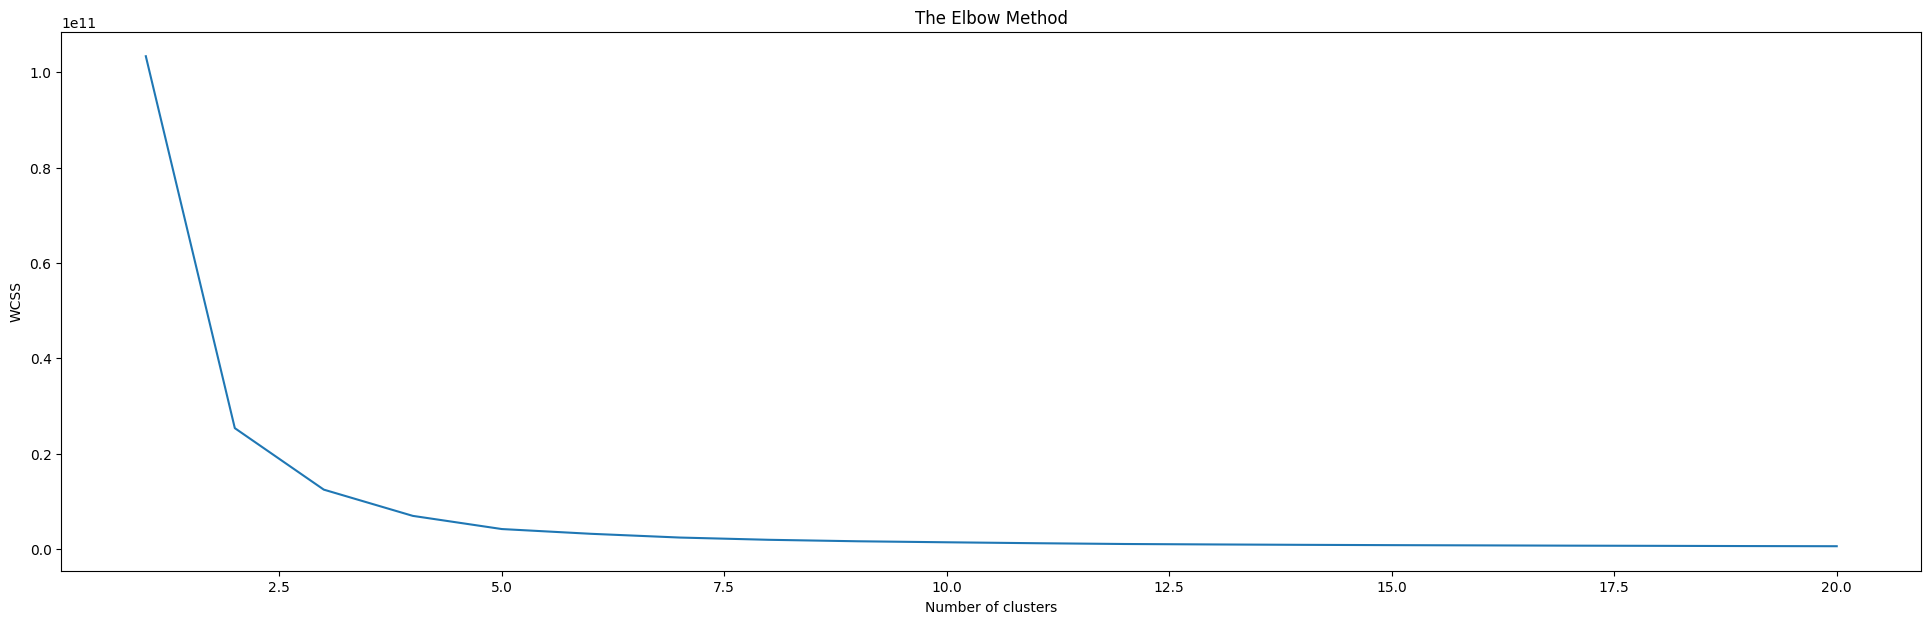

In [10]:
# Elbow method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(24,7))
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Shows 2 clusters to be formed:

In [11]:
# Random Sampling data
sampled_dataset = data.sample(n=20000, random_state=42)

In [12]:
# Applying Kmeans Clustering:

km = KMeans(n_clusters = 2, init = 'k-means++')
sampled_dataset['KMeans']=km.fit_predict(sampled_dataset)

cluster_sizes = Counter(sampled_dataset['KMeans'])

for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples")

Cluster 0: 14597 samples
Cluster 1: 5403 samples


In [13]:
# Applying Agglomerative clustering:

ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
sampled_dataset['Agglomerative'] = ac.fit_predict(sampled_dataset)

cluster_sizes_a = Counter(sampled_dataset['Agglomerative'])

for cluster, size in cluster_sizes_a.items():
    print(f"Cluster {cluster}: {size} samples")

Cluster 1: 13262 samples
Cluster 0: 6738 samples


**Interpretation**:

The difference in the sizes of clusters suggests that the data points are not evenly distributed across the clusters.
In both clustering algorithms, there is an imbalance in cluster sizes, indicating that certain clusters may be more dominant or prevalent in the data.

K- Means and Agglomerative Clustering


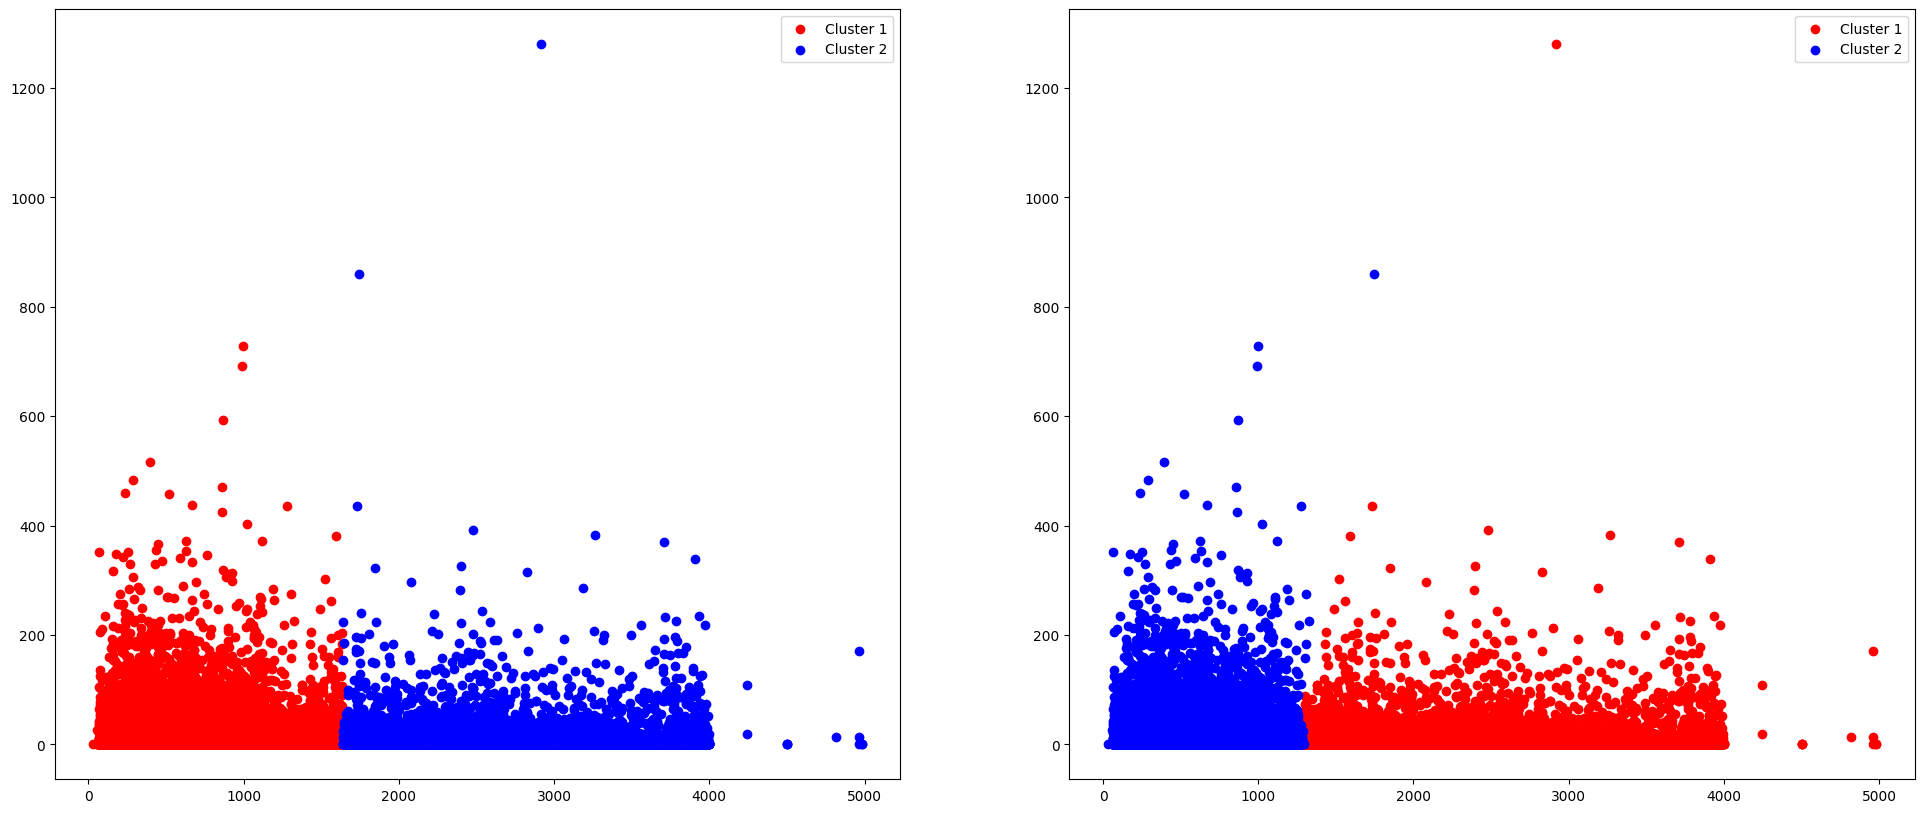

In [14]:
# visualizing clusters:

print("K- Means and Agglomerative Clustering")
figure, axes = plt.subplots(1, 2, figsize=(24, 10))
colors = ['red','blue','yellow','green']
axes[0].scatter(data=sampled_dataset[sampled_dataset['KMeans']==0], x='Flight Distance', y='Arrival Delay in Minutes',color='red', label='Cluster 1')
axes[0].scatter(data=sampled_dataset[sampled_dataset['KMeans']==1], x='Flight Distance', y='Arrival Delay in Minutes',color='blue', label='Cluster 2')
axes[0].legend()
axes[1].scatter(data=sampled_dataset[sampled_dataset['Agglomerative']==0], x='Flight Distance', y='Arrival Delay in Minutes',color='red', label='Cluster 1')
axes[1].scatter(data=sampled_dataset[sampled_dataset['Agglomerative']==1], x='Flight Distance', y='Arrival Delay in Minutes',color='blue', label='Cluster 2')
axes[1].legend()

In [15]:
# Evaluate clustering performance using Silhouette Score

print("For K-Means Clustering:")

silhouette_avg = silhouette_score(sampled_dataset, sampled_dataset['KMeans'])
print("Silhouette Score: ", silhouette_avg)

print("\n")

print("For Agglomerative Clustering:")

silhouette_avg = silhouette_score(sampled_dataset, sampled_dataset['Agglomerative'])
print("Silhouette Score: ", silhouette_avg)

For K-Means Clustering:
Silhouette Score:  0.6907365413376514


For Agglomerative Clustering:
Silhouette Score:  0.6729653869913153


**Interpretation:**

Both K-Means and Agglomerative Clustering have relatively high silhouette scores, indicating that the clusters formed by both algorithms are dense and well-separated.
The silhouette score for K-Means clustering (0.691) is slightly higher than that for Agglomerative Clustering (0.673), suggesting that K-Means may have produced clusters that are slightly more internally cohesive and better separated from other clusters compared to Agglomerative Clustering in this specific case.

In [16]:
#  Calculating memory usage and time taken

def run_cluster_model(sampled_dataset):
    start_time = time.time()

    # Create and fit KMeans clustering model
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(sampled_dataset)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Memory usage
    mem_usage = memory_profiler.memory_usage()
    max_mem_usage = max(mem_usage)

    return elapsed_time, max_mem_usage

# Example usage
if __name__ == '__main__':
    # Assuming 'data' is your dataset
    elapsed_time, max_mem_usage = run_cluster_model(sampled_dataset)
    print("Kmeans Clustering")
    print("Time taken:", elapsed_time, "seconds")
    print("Maximum memory usage:", max_mem_usage, "MB")

Kmeans Clustering
Time taken: 0.9407715797424316 seconds
Maximum memory usage: 319.546875 MB


In [17]:
#  Calculating memory usage and time taken

def run_cluster_model(sampled_dataset):
    start_time = time.time()

    # Create and fit KMeans clustering model
    ac = AgglomerativeClustering(n_clusters=2)
    ac.fit(sampled_dataset)


    end_time = time.time()
    elapsed_time = end_time - start_time

    # Memory usage
    mem_usage = memory_profiler.memory_usage()
    max_mem_usage = max(mem_usage)

    return elapsed_time, max_mem_usage

# Example usage
if __name__ == '__main__':
    # Assuming 'data' is your dataset
    elapsed_time, max_mem_usage = run_cluster_model(sampled_dataset)
    print("Kmeans Clustering")
    print("Time taken:", elapsed_time, "seconds")
    print("Maximum memory usage:", max_mem_usage, "MB")

Kmeans Clustering
Time taken: 36.44144940376282 seconds
Maximum memory usage: 319.5546875 MB


**Interpretation:**

KMeans clustering is advantageous in terms of computational efficiency and memory usage, especially for large datasets, as it can handle large-scale data efficiently.
Agglomerative clustering, while slower and potentially more memory-intensive, offers the advantage of producing hierarchical cluster structures, which may be useful for certain types of data or analytical tasks.
The choice between KMeans and Agglomerative clustering depends on various factors, including the size and nature of the dataset, the desired cluster structure, computational resources available, and the specific objectives of the analysis.

In [18]:
# Calculate Adjusted Rand Index
ari = adjusted_rand_score(sampled_dataset['KMeans'], sampled_dataset['Agglomerative'])
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.7447265532423588


**Interpretation:**

The ARI value of 0.745 indicates a high degree of similarity between the clusterings produced by KMeans and Agglomerative clustering algorithms.
This suggests that the two clustering algorithms have produced similar cluster assignments on the dataset.

The high ARI value implies that both clustering algorithms have identified similar patterns or structures within the data, leading to comparable cluster assignments.
ARI takes into account chance agreement, so the observed similarity between the clusterings is significant beyond random chance.

**Managerial Implications:**

Understanding the natural groupings or patterns within the data can help managers gain insights into customer segments, market trends, product preferences, or operational efficiencies.
Identifying clusters allows managers to tailor their strategies, products, or services to better meet the needs of different customer segments.
Algorithm Selection:

The choice of clustering algorithm (e.g., KMeans, Agglomerative) should consider factors such as computational efficiency, interpretability of results, and suitability for the dataset's characteristics.
Managers should assess the trade-offs between different clustering algorithms based on performance metrics, computational resources, and the desired cluster structure.
Resource Allocation:

Clustering analysis can inform resource allocation decisions by identifying areas of focus or investment based on the characteristics of different clusters.
Managers can allocate marketing budgets, staffing, or product development resources more effectively by targeting specific customer segments or market niches identified through clustering.